In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('my_app').getOrCreate()
df=spark.read.csv('/content/ML_hw_dataset.csv',header=True,inferSchema=True)

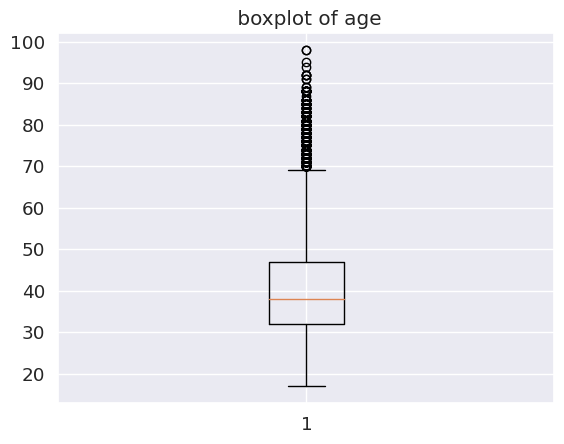

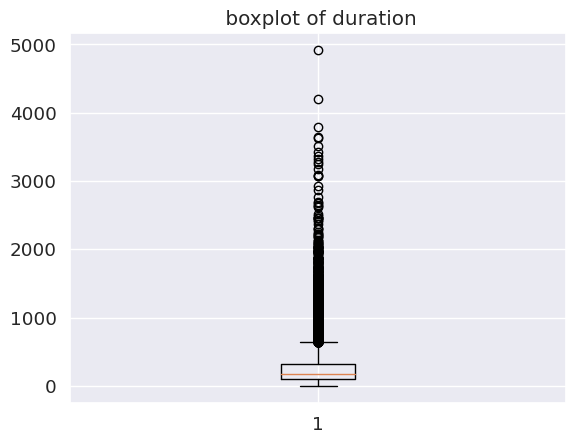

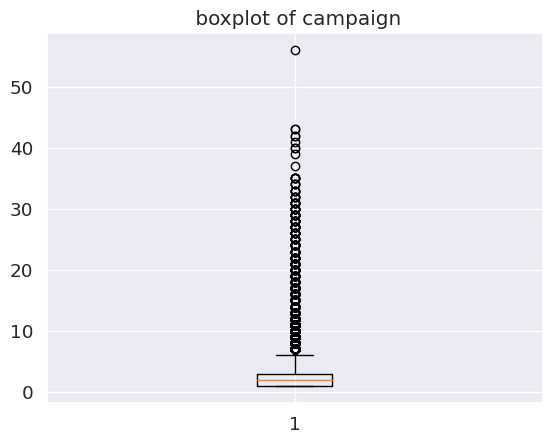

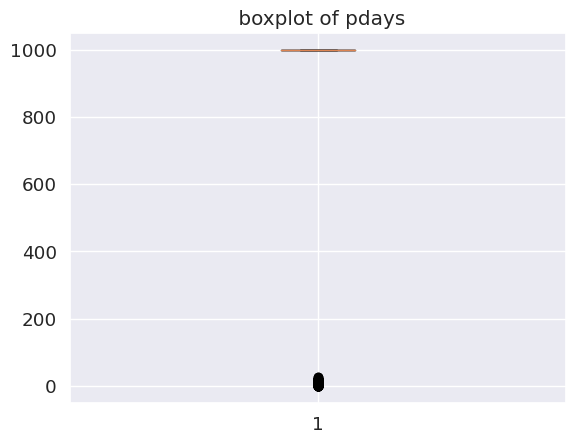

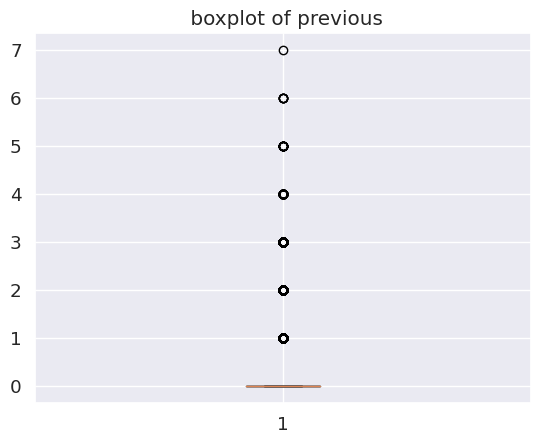

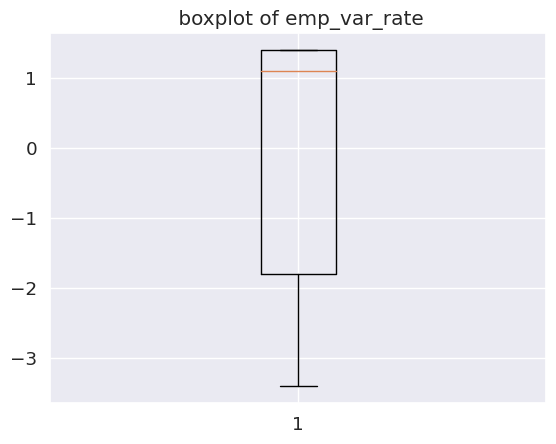

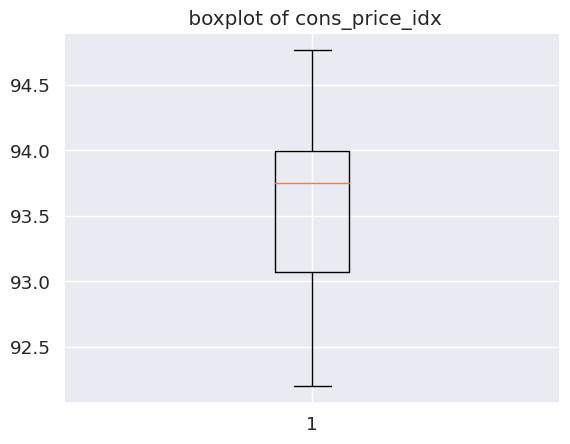

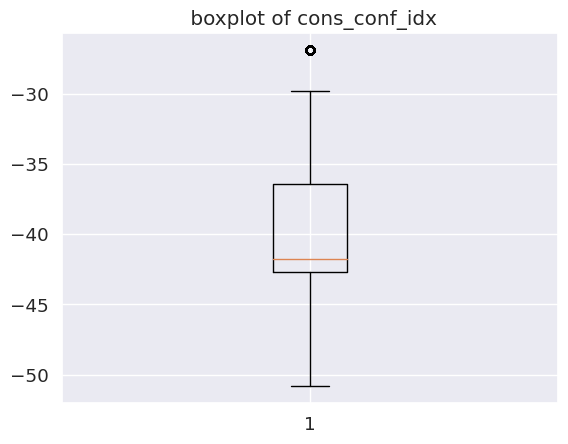

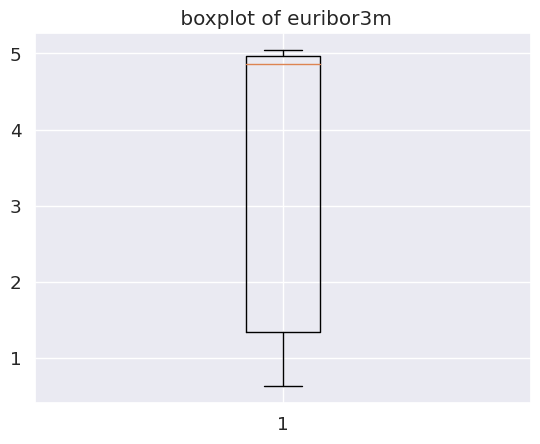

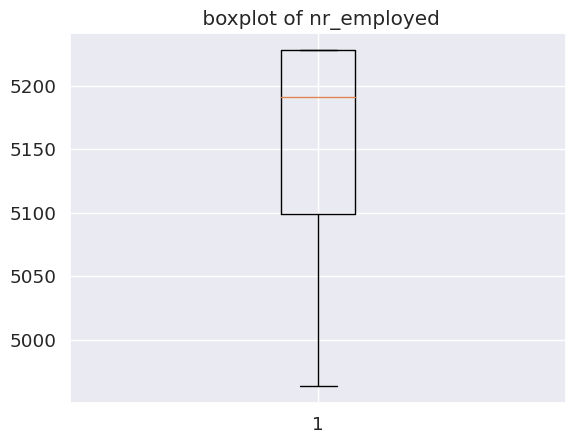

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols=[c for c ,t in df.dtypes if t in ['int','double','float','long']]
x=0
for i in [0,10,11,12,13,15,16,17,18,19]:
  bxp = df.select(df.columns[i]).rdd.flatMap(lambda x: x).collect()
  plt.figure()
  plt.boxplot(bxp)
  col=numeric_cols[x]
  x=x+1
  plt.title(f" boxplot of {col}")
  plt.show()

In [3]:
df.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

In [10]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.stat import Correlation
from pyspark.ml import Pipeline
from pyspark.sql.functions import *
from pyspark.sql.functions import corr
from pyspark.sql.functions import col
from pyspark.ml.feature import PCA

from pyspark.ml.classification import LogisticRegression
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [4]:
df.describe().show()

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|          campaign|             pdays|           previous|poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|                  y|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|  

In [5]:
from pyspark.sql.functions import isnan,when,count,col
df.select([count(when(isnan(i)|col(i).isNull(),i)).alias(i) for i in df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



In [ ]:
#df=df.replace('unknown',None)

In [ ]:
#df=df.dropna()

In [ ]:
from pyspark.sql.functions import col

numeric_cols=[c for c ,t in df.dtypes if t in ['int','double','float','long']]

for col_name in numeric_cols:
  q1=df.approxQuantile(col_name,[0.25],0.01)[0]
  q3=df.approxQuantile(col_name,[0.75],0.01)[0]
  iqr=q3-q1

  k=1.5
  lower_bound=q1-k*iqr
  upper_bound=q3+k*iqr
  
  df=df.filter((col(col_name) >= lower_bound) & (col(col_name)<=upper_bound))
  #df.write.mode('overwrite').csv('/content/hazf data part.csv')

In [8]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
string_cols = [col_name for col_name, col_type in df.dtypes if col_type == 'string']
indexers = [StringIndexer(inputCol=col_name, outputCol=col_name + "_indexed") for col_name in string_cols]
indexer_pipeline = Pipeline(stages=indexers)
df_indexed = indexer_pipeline.fit(df).transform(df)
#from pyspark.ml.feature import StringIndexer
#indexer=StringIndexer(inputCol='',outputCol='indexed')
#string_cols = [col_name for col_name, col_type in df.dtypes if col_type == "string"]
#for col in string_cols:
#out_cols = [c+'_index' for c in string_cols]
#indexer = StringIndexer(inputCols=string_cols, outputCols=out_cols)
#df=indexer.fit(df).transform(df)
#df.write.mode('overwrite').csv('/content/string1.csv')

In [9]:
df.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

In [13]:
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.feature import VectorAssembler,StandardScaler,MinMaxScaler

spark = SparkSession.builder.appName("Normalization").getOrCreate()

numeric_cols = [col for col, dtype in df.dtypes if dtype == "int" or dtype == "double"]
df_numeric = df.select(numeric_cols)

assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
df_numeric_assembled = assembler.transform(df_numeric).select("features")

scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_numeric_assembled)
df_normalized = scaler_model.transform(df_numeric_assembled)

df_normalized = df_normalized.withColumn("id", monotonically_increasing_id())
df = df.withColumn("id", monotonically_increasing_id())

df_normalized = df_normalized.join(df, "id", "outer").drop(df_normalized["id"])
df_normalized.show(10)

+---+--------------------+--------------------+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| id|            features|     scaled_features|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+--------------------+--------------------+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|  0|[44.0,210.0,1.0,9...|[0.33333333333333...| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     

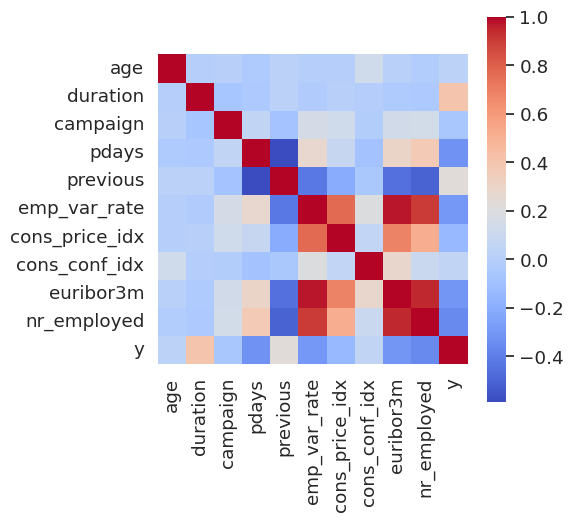

In [14]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [c for c,d in df.dtypes if d in ['int','double']]

assembler = VectorAssembler(inputCols=numeric_cols, outputCol='features')
assembled_data = assembler.transform(df).select('features')

correlation_matrix = Correlation.corr(assembled_data, 'features').head()
corr_array = correlation_matrix[0].toArray()

col_names = [c for c in numeric_cols]

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr_array, cmap='coolwarm', square=True, xticklabels=col_names, yticklabels=col_names, ax=ax)

plt.show()

In [25]:
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
assembled_df = assembler.transform(df_indexed)

pca = PCA(k=20, inputCol="features", outputCol="pca_features")
model = pca.fit(assembled_df)
pca_df = model.transform(assembled_df).select("pca_features","y")
pca_df.show()

+--------------------+---+
|        pca_features|  y|
+--------------------+---+
|[-34.249841777997...|  0|
|[36.9117000328894...|  0|
|[-240.74187872319...|  1|
|[-11.827400346307...|  0|
|[-37.913564221306...|  1|
|[107.341775240428...|  0|
|[-30.772091972570...|  0|
|[-17.809824534812...|  0|
|[-74.804875170633...|  1|
|[-17.809750377932...|  0|
|[112.600023401286...|  0|
|[-611.56155579831...|  0|
|[-195.77640489346...|  1|
|[97.8552134239369...|  0|
|[-842.88454309621...|  0|
|[58.4791282087208...|  0|
|[-858.35189448033...|  1|
|[-363.91432475598...|  1|
|[34.8273765221138...|  0|
|[71.4432684942740...|  0|
+--------------------+---+
only showing top 20 rows



In [50]:
df_normalized.select([corr('age', 'y').alias('corr_age_y'),
           corr('pdays', 'y').alias('corr_pdays_y'),
           corr('emp_var_rate', 'y').alias('corr_emp_var_rate_y'),
           corr('cons_price_idx', 'y').alias('corr_cons_price_idx_y'),
           corr('cons_conf_idx', 'y').alias('corr_cons_conf_idx_y'),
           corr('euribor3m', 'y').alias('corr_euribor3m_y'),
           corr('job_index', 'y').alias('corr_job_index_y'),
           corr('marital_index', 'y').alias('corr_marital_index_y'),
           corr('education_index', 'y').alias('corr_education_index_y'),
           corr('default_index', 'y').alias('corr_default_index_y'),
           corr('housing_index', 'y').alias('corr_housing_index_y'),
           corr('contact_index', 'y').alias('corr_contact_index_y'),
           corr('month_index', 'y').alias('corr_month_index_y'),
           corr('day_of_week_index', 'y').alias('corr_day_of_week_index_y'),
           corr('poutcome_index', 'y').alias('corr_dpoutcome_index_y')])

AnalysisException: ignored

In [26]:
lr = LogisticRegression(labelCol='y', featuresCol='pca_features')

In [27]:
train_data, test_data = pca_df.randomSplit([0.8, 0.2], seed=42)
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='y', rawPredictionCol='prediction')
auc = evaluator.evaluate(predictions)
print(auc)

print(lr_model.evaluate(test_data).accuracy)

0.6817471338897249
0.9110840438489647


In [ ]:
ns = lr_model.evaluate(test_data)
ns.accuracy


0.9108404384896468

In [ ]:
print(ns.precisionByLabel)
print(ns.recallByLabel)

[0.9275173044273214, 0.6799276672694394]
[0.9756834730045336, 0.4038668098818475]
